<a href="https://colab.research.google.com/github/ej970221/ORIE-4580/blob/main/HW4ORIE4580.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ORIE 4580/5580/5581 Assignment 4

#### Students: Eunyoung (Katie) Jung (ej97) and Emuna Rouhani (er443)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Friday September 29, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 5 (sections 5.1, 5.2 and 5.3) and 6, as well as chapter 11 (to revise again what we discussed in class about confidence intervals) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).




---
---


# Question 1: Multivariate normals, and some finance (20 points)


Assume the following means and covariance matrix for the net annual returns (annual returns after accounting for inflation) on three investments:

$$\boldsymbol{\mu}=
\begin{bmatrix}
    \mu_{\text{U.S. stocks}}\\
    \mu_{\text{U.S. bonds}}\\
    \mu_{\text{EM bonds}}
\end{bmatrix}=
\begin{bmatrix}
    0.14 \\
    0.07 \\
    0.16\\
\end{bmatrix},$$

Moreover, we have $\sigma^2_{\text{U.S. stocks}}=0.0625, \sigma^2_{\text{U.S. bonds}}=0.01$ and $\sigma^2_{\text{EM bonds}}=0.09$. Assuming all three instruments are independent of each other, what is the probability that all three financial products simultaneously yield a positive return?


___
## Ans.

Assuming the following means and variances:

$
\boldsymbol{\mu} =
\begin{bmatrix}
    \mu_{\text{U.S. stocks}} \\
    \mu_{\text{U.S. bonds}} \\
    \mu_{\text{EM bonds}}
\end{bmatrix} =
\begin{bmatrix}
    0.14 \\
    0.07 \\
    0.16
\end{bmatrix},
$

$
\sigma^2_{\text{U.S. stocks}} = 0.0625, \quad \sigma^2_{\text{U.S. bonds}} = 0.01, \quad \sigma^2_{\text{EM bonds}} = 0.09
$

The covariance matrix $\Sigma$ is:

$
\Sigma =
\begin{bmatrix}
    0.0625 & 0 & 0 \\
    0 & 0.01 & 0 \\
    0 & 0 & 0.09
\end{bmatrix}
$

The probability that all three financial products simultaneously yield a positive return is:

$
P(\text{U.S. stocks} > 0, \text{U.S. bonds} > 0, \text{EM bonds} > 0) = P(\text{U.S. stocks} > 0) \times P(\text{U.S. bonds} > 0) \times P(\text{EM bonds} > 0)
$

Where:

$
P(\text{U.S. stocks} > 0) = 1 - \Phi\left(\frac{0 - \mu_{\text{U.S. stocks}}}{\sqrt{\sigma^2_{\text{U.S. stocks}}}}\right)
$

$
P(\text{U.S. bonds} > 0) = 1 - \Phi\left(\frac{0 - \mu_{\text{U.S. bonds}}}{\sqrt{\sigma^2_{\text{U.S. bonds}}}}\right)
$

$
P(\text{EM bonds} > 0) = 1 - \Phi\left(\frac{0 - \mu_{\text{EM bonds}}}{\sqrt{\sigma^2_{\text{EM bonds}}}}\right)
$


$
P(\text{U.S. stocks} > 0) = 1 - \Phi\left(\frac{0 - 0.14}{\sqrt{0.0625}}\right) \approx 0.7332
$

$
P(\text{U.S. bonds} > 0) = 1 - \Phi\left(\frac{0 - 0.07}{\sqrt{0.01}}\right) \approx 0.9772
$

$
P(\text{EM bonds} > 0) = 1 - \Phi\left(\frac{0 - 0.16}{\sqrt{0.09}}\right) \approx 0.7901
$

Finally, the probability that all three financial products simultaneously yield a positive return is:

$
P(\text{U.S. stocks} > 0, \text{U.S. bonds} > 0, \text{EM bonds} > 0) \approx 0.7332 \times 0.9772 \times 0.7901 \approx 0.5677
$


___

**(b)** Next, assume that the assets are not independent, but rather, have covariance matrix
$$\boldsymbol{\Sigma}=
\begin{bmatrix}
    0.0625 & -0.01 & 0.0375 \\
    -0.01 & 0.01 & -0.015 \\
    0.0375 & -0.015 & 0.09
\end{bmatrix}.$$

Using simulation, estimate the probability that all three financial products simultaneously yield a positive return.
For the purposes of this problem, you are **not allowed** to use the Python function ${\tt numpy.random.multivariate\_normal}$, but rather, should generate *independent* normal rvs, and then apply the method(s) discussed in class.
In particular, you can compute the Cholesky decomposition of the covariance matrix using the Python function ${\tt scipy.linalg.cholesky(sigma, lower=True)}$.
___

## Ans.



In [ ]:
import numpy as np
from scipy.linalg import cholesky

# Given covariance matrix
Sigma = np.array([[0.0625, -0.01, 0.0375],
                  [-0.01, 0.01, -0.015],
                  [0.0375, -0.015, 0.09]])

# Generate independent standard normal random variables
n_simulations = 100000
n_investments = 3
independent_rvs = np.random.normal(size=(n_simulations, n_investments))

# Apply Cholesky decomposition
L = cholesky(Sigma, lower=True)

# Transform independent random variables to correlated random variables
correlated_rvs = np.dot(independent_rvs, L.T)

positive_returns = (total_returns > 0).all(axis=1)

# Calculate the probability
probability_positive_returns = positive_returns.sum() / n_simulations

print(f"Estimated Probability: {probability_positive_returns}")


Estimated Probability: 0.36807


In [ ]:
import numpy as np
from scipy.linalg import cholesky

# Given covariance matrix
Sigma = np.array([[0.0625, -0.01, 0.0375],
                  [-0.01, 0.01, -0.015],
                  [0.0375, -0.015, 0.09]])

# Define the means
mean_returns = np.array([0.14, 0.07, 0.16])

# Number of simulations
n_simulations = 100000

# Generate independent standard normal random variables
n_investments = len(mean_returns)
independent_rvs = np.random.normal(size=(n_simulations, n_investments))

# Apply Cholesky decomposition
L = cholesky(Sigma, lower=True)

# Transform independent random variables to correlated random variables
correlated_rvs = np.dot(independent_rvs, L.T)

# Calculate the total returns for each simulation
total_returns = correlated_rvs + mean_returns

positive_returns = (total_returns > 0).all(axis=1)

# Calculate the probability
probability_positive_returns = positive_returns.sum() / n_simulations

print(f"Estimated Probability: {probability_positive_returns}")


Estimated Probability: 0.37034


___
___

# Question 2: Covariance and copulas (30 points)

In general (i.e., apart from multivariate normals), *there is no closed form formula for generating rvs with given marginals and given covariance matrix*. However, a popular heuristic is the so-called *Gaussian copula trick*, which is widely used in finance. In this question, we will try and get a sense of how we can generate correlated uniforms, and how the Gaussian copula trick works.

___

**(a)** We will first try and make a method for generating two correlated uniform random variables $V_1$, $V_2$ with mean $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0$, variance $Var(V_1)=Var(V_2)=1$, and covariance $Cov( V_1, V_2 ) = \sigma_{12}$ (for some given $\sigma_{12}\geq 0$).

For what $\alpha,\beta\in\mathbb{R}$ does a uniform distribution on $[\alpha,\beta]$ have mean $0$ and variance $1$.
___


The mean of a continuous uniform distribution on the interval $[a, b]$ is given by:

$E(X) = \frac{a + b}{2}$

and the variance is given by:

$Var(X) = \frac{(b - a)^2}{12}$

In this case, you're given that the mean is $0$ and the variance is $1$. Substituting these values into the formulas, we get:

$0 = \frac{\alpha + \beta}{2}$

$1 = \frac{(\beta - \alpha)^2}{12}$

From the first equation, we get $\beta = -\alpha$. Substituting this into the second equation, we get:

$1 = \frac{(2\alpha)^2}{12} = \frac{4\alpha^2}{12} = \frac{\alpha^2}{3}$

Solving for $\alpha$, we find:

$\alpha = \pm \sqrt{3}$

Since $\beta = -\alpha$, we also have $\beta = \mp \sqrt{3}$.

So, for $\alpha = \sqrt{3}$ and $\beta = -\sqrt{3}$, or for $\alpha = -\sqrt{3}$ and $\beta = \sqrt{3}$, the uniform distribution on the interval $[\alpha, \beta]$ will have mean $0$ and variance $1$.

___

**(b)** Next, generate rvs $X_1,X_2\sim Uniform[\alpha, \beta]$ i.i.d (with $\alpha,\beta$ from previous part), and also sample $B\sim Bernoulli(p)$. Define:
\begin{align*}
	V_1 = X_1 \qquad,\qquad
	V_2 = (1-B)X_1+BX_2 = \begin{cases} X_1 & \text{ if $B = 0$} \\ X_2 & \text{ if $B = 1$} \end{cases}
	\end{align*}

What is $\mathbb{E}[V_2]$ and $Var(V_2)$?
___

## Ans.

According to the law of total expectation, if $X$ is a random variable and $B_1, B_2, \ldots, B_n$ form a partition of the sample space (i.e., they are mutually exclusive events whose union is the entire sample space), then the expectation of $X$ can be calculated as:

$$
E[X] = \sum_{i=1}^{n} E[X \mid B_i] \cdot P(B_i)
$$

where $E[X]$ is the overall expectation of  $X$,
$E[X \mid B_i]$ is the conditional expectation of $X$ given event $B_i$,
$P(B_i)$ is the probability of event $B_i$.

Using this we can find: $E[V_2] = E[V_2 \mid B_0]*P(B_0) + E[V_2 \mid B_1]*P(B_1) = E[X_1]*P(B_0) + E[X_2]*P(B_1) = 0*(1-p) + 0*(p) = 0 $

$Var(V_2) = E[V_2^2] + E[V_2]^2$

$E[V_2^2] = E[V_2^2 \mid B_0]*P(B_0) + E[V_2^2 \mid B_1]*P(B_1)$
$E[V_2^2] = E[X_1^2](1-p) + E[X_2^2](p)$

$E[X_1^2] = E[X_2^2] = \int_{-\sqrt{3}}^{\sqrt{3}} \frac{x^2}{2*\sqrt{3}} \, dx = 1$

$E[V_2^2]= 1-p+p = 1$

$Var(V_2) = 1 + 0^2 = 1$




___
**(c)** For what value of $p$ do we get $Cov(V_1, V_2 )=\sigma_{12}$ (for $\sigma_{12}\geq 0$)?
___

## Ans.

$Cov(V_1, V_2 )= E[V_1,V_2]- E[V_1]*E[V_2] $

$E[V_1] = E[X_1] = 0.$ Therefore, $E[V_1]*E[V_2] = 0$

$E[V_1,V_2] = E[X_1^2]P(B_0) + E[X_1 * X_2]P(B_1) = E[X_1^2]P(B_0) + E[X_1] * E[X_2]*P(B_1) = 1*(1-p) + 0*0 = 1-p$

$Cov(V_1, V_2 )= 1-p = \sigma_{12}$

$p = 1-\sigma_{12}$

___

**(d)** Create a function to generate two correlated uniform random variables $V_1$, $V_2$ such that $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0,Var(V_1)=Var(V_2)=1$ and $Cov( U_1, U_2 ) = \sigma_{12}$. Use this to show a scatter plot of $(V_1,V_2)$ for correlation values $\sigma_{12}=0,0.25,0.5,0.75$ and $1$.

___

## Ans.

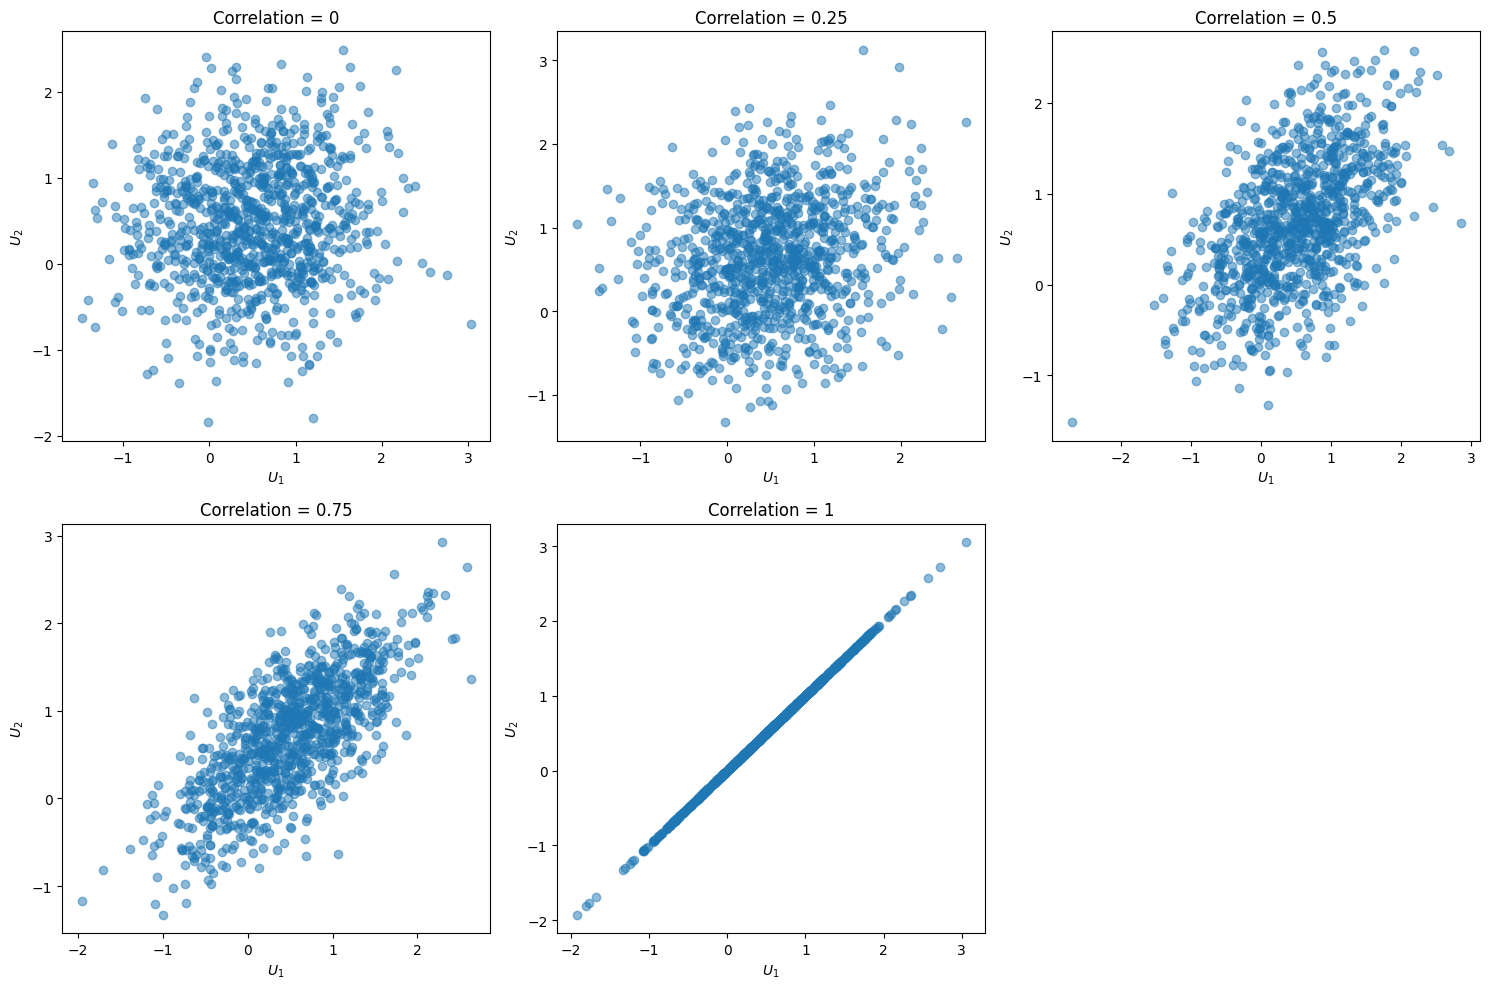

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_correlated_uniform(sigma12, n_samples):
    # Step 1: Generate independent standard normal random variables
    Z1 = np.random.normal(size=n_samples)
    Z2 = np.random.normal(size=n_samples)

    # Step 2: Transform Z1 and Z2 to standard uniform random variables
    U1 = (1 + np.sqrt(2) * Z1) / 2
    U2 = (1 + np.sqrt(2) * Z2) / 2

    # Step 3: Adjust U2 to have desired correlation with U1
    U2 = sigma12 * U1 + np.sqrt(1 - sigma12**2) * U2

    return U1, U2

# Generate correlated uniform random variables
correlations = [0, 0.25, 0.5, 0.75, 1]
n_samples = 1000

plt.figure(figsize=(15, 10))

for i, sigma12 in enumerate(correlations):
    U1, U2 = generate_correlated_uniform(sigma12, n_samples)

    # Plot scatter plot
    plt.subplot(2, 3, i+1)
    plt.scatter(U1, U2, alpha=0.5)
    plt.title(f'Correlation = {sigma12}')
    plt.xlabel('$U_1$')
    plt.ylabel('$U_2$')

plt.tight_layout()
plt.show()


___

**(e)** Using the above function, compute $\mathbb{P}[V_1\leq 0,V_2\leq 0]$ for the case when $\sigma_{12}=0.5$ (in a financial application, this can correspond to *both* $V_1$ and $V_2$ 'defaulting').
___

## Ans.

In [4]:
sigma12 = 0.5
n_samples = 100000

U1, U2 = generate_correlated_uniform(sigma12, n_samples)

V1 = U1
V2 = sigma12 * U1 + np.sqrt(1 - sigma12**2) * U2
count = np.sum((V1 <= 0) & (V2 <= 0))
probability = count / n_samples

print(f"The probability P(V1 <= 0, V2 <= 0) is approximately: {probability}")

The probability P(V1 <= 0, V2 <= 0) is approximately: 0.11988


___

**(f)** The Gaussian copula trick is based on first generating a multivariate normal vector with given covariance matrix $\Sigma$, and then using inversion to convert it to a vector of uniform rvs, which can then used to generate the desired rvs. We now demonstrate this in the above setting.

Let $\phi(\cdot)$ denote the 1-d normal cdf. Generate $(Z_1,Z_2)$ as multivariate normals with covariance
$\Sigma =\begin{pmatrix}
		1 & 0.5 \\
		0.5 & 1
	\end{pmatrix}$,
and define $W_1 = \alpha + (\beta-\alpha)\phi(Z_1)$ and $W_2 = \alpha + (\beta-\alpha)\phi(Z_2)$.

Argue $W_1$, $W_2$ are uniform on $[\alpha,\beta]$ (and hence $\mathbb{E}[W_1]=\mathbb{E}[W_2]=0,Var(W_1)=Var(W_2)=1$). Next, for $\sigma_{12}=0.5$ and $\alpha,\beta$ as above, write a function to generate $W_1,W_2$ as described, and use these to plot the scatter plot, and compute $\mathbb{P}[W_1\geq 0,W_2\geq 0]$.

___

## Ans.
$W_1, W_2$ are uniform on $[\alpha , \beta]$ because the function $\phi(\cdot)$ is a normal cdf, which takes on values between 0 and 1. The formula for $W_1, W_2$, $W = \alpha + (\beta-\alpha)\phi(Z)$ generates values between $\alpha$ and $\beta$ with equal probability since $\phi(\cdot)$ is a normal cdf.


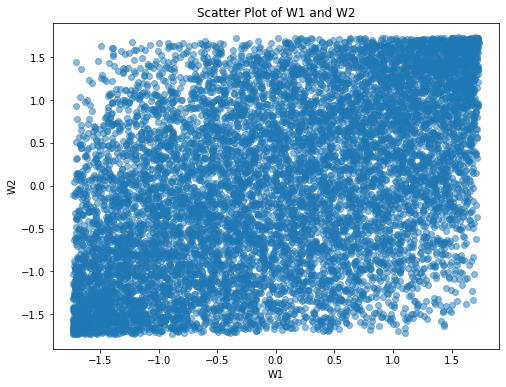

Estimated Probability: 0.3365


In [ ]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

# Define parameters
alpha = np.sqrt(3)
beta = -np.sqrt(3)
sigma = np.array([[1, 0.5], [0.5, 1]])
L = np.linalg.cholesky(sigma)
n_samples = 10000

# Generate standard normal random variables
Z = np.dot(L, np.random.normal(size=(2, n_samples)))

# Generate W using the given formula
W = alpha + (beta - alpha) * scipy.stats.norm.cdf(Z)

# Extract W1 and W2
W1 = W[0]
W2 = W[1]

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(W1, W2, alpha=0.5)
plt.title('Scatter Plot of W1 and W2')
plt.xlabel('W1')
plt.ylabel('W2')
plt.show()

# Calculate the probability P[W1 >= 0, W2 >= 0]
probability = np.mean((W1 >= 0) & (W2 >= 0))
print(f'Estimated Probability: {probability}')


In [ ]:
count = np.sum((W1 >= 0) & (W2 >= 0))
probability = count / n_samples
print(f'Estimated Probability: {probability}')


Estimated Probability: 0.3365


___
___

# Question 3: Generating random samples in some given set (20 pts)

___

**(a)** We want to sample points which are uniformly distributed in the set  $\mathcal{S} = \{(x,y)| x\in \mathbb{R}, y \in [0,e^{-x^2/2}]\}$ (i.e., between the lines $y=0$ and $y=e^{-x^2/2}$). Generate 1000 independent samples $(X_i,Y_i)$, and plot them using a scatterplot, along with the lines $y=0$ and $y=e^{-x^2/2}$.

(Hint: Try to 'reverse' what we do in Acceptance-Rejection).
___

## Ans.

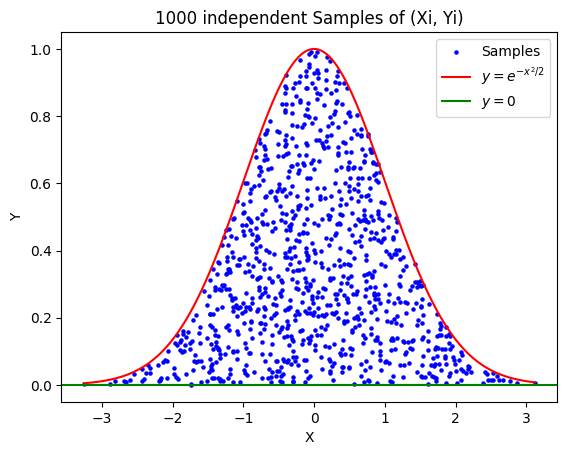

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000
xi = np.random.randn(n)

yi = np.random.uniform(0, np.exp(-0.5 * xi**2))

x = np.linspace(min(xi), max(xi), 1000)

plt.scatter(xi, yi, s=5, c='blue', label='Samples')
plt.plot(x, np.exp(-0.5 * x**2), 'r-', label=r'$y = e^{-x^2/2}$')
plt.plot(x, x*0, 'g', label=r'$ y = 0 $')
plt.axhline(y=0, color='g', linewidth=1.5)
plt.title('1000 independent Samples of (Xi, Yi)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

___
**(b)** Next, suppose we want to sample points which are uniformly distributed on the set $\{(x,y)\in\mathbb{R}^2|x^2+y^2 = 1\}$ (i.e., on the *circumference* of the unit circle). One way to do so may be to generate points $(U_i,V_i)$ uniformly in $[-1,1]^2$ (like in the first homework), and then *project* them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{U_i}{\sqrt{U_i^2+V_i^2}},\frac{V_i}{\sqrt{U_i^2+V_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Try checking the histogram of their angles (i.e., the histogram of $\theta_i = \tan^{-1}(Y_i/X_i)$).
___

## Ans.

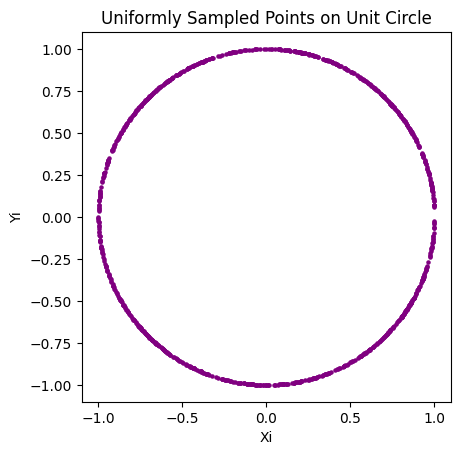

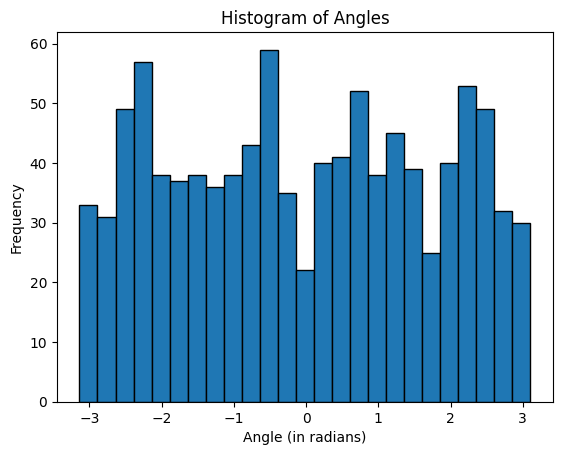

In [3]:
n = 1000

ui = np.random.uniform(-1, 1, n)
vi = np.random.uniform(-1, 1, n)

r = np.sqrt(ui**2 + vi**2)

xi = ui/r
yi = vi/r

angles = np.arctan2(yi, xi)

plt.scatter(xi, yi, s=5, c='purple', label='Samples')
plt.title('Uniformly Sampled Points on Unit Circle')
plt.xlabel('Xi')
plt.ylabel('Yi')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

plt.hist(angles, bins=25, edgecolor='black')
plt.title('Histogram of Angles')
plt.xlabel('Angle (in radians)')
plt.ylabel('Frequency')
plt.show()



---

**(c)** Next, generate points $(Z_i,W_i)$ as independent standard normals (i.e., $(Z_i,W_i)\sim \mathcal{N}(0,I_2)$, and again project them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{Z_i}{\sqrt{Z_i^2+W_i^2}},\frac{W_i}{\sqrt{Z_i^2+W_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Again, check the histogram of their angles $\theta_i$. Can you explain the difference between parts (b) and (c)?

___

## Ans.

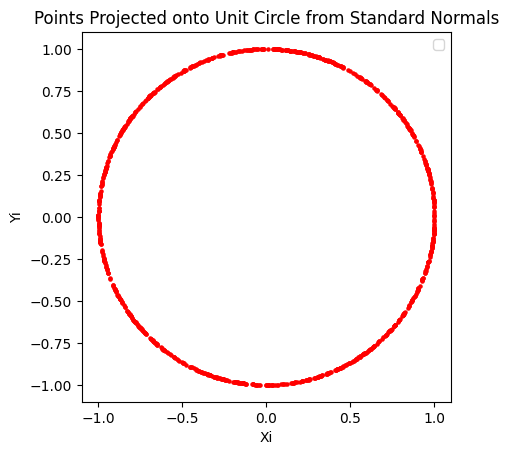

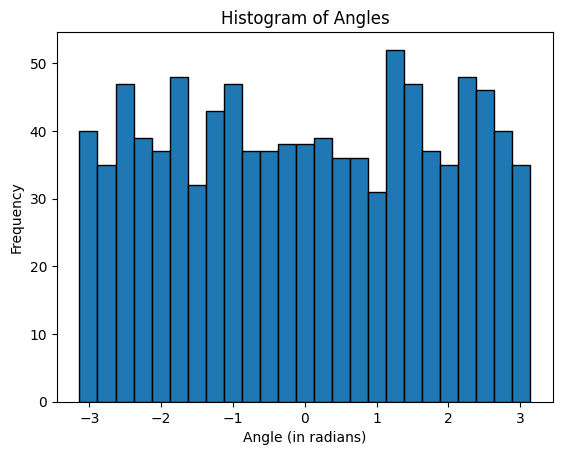

In [5]:
n = 1000

zi = np.random.randn(n)
wi = np.random.randn(n)

r = np.sqrt(zi**2 +wi**2)

xi = zi/r
yi = wi/r

plt.scatter(xi, yi, s=5,color ='red')
plt.title('Points Projected onto Unit Circle from Standard Normals')
plt.xlabel('Xi')
plt.ylabel('Yi')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

angles = np.arctan2(yi, xi)
plt.hist(angles, bins=25, edgecolor='black')
plt.title('Histogram of Angles')
plt.xlabel('Angle (in radians)')
plt.ylabel('Frequency')
plt.show()


___
___

# Question 4: The Inspection paradox (30 pts)

Have you ever felt like you wait too long for elevators, taxis, buses, etc.? Guess what - you may be right!

We are going to simulate a number of train and passenger arrivals at a station, and try to measure the time each passenger needs to wait for a train. To do this, first generate a stream of 10,000 train passengers, each of whom have an independent arrival time which is uniformly distributed over an interval of 1,000 minutes (i.e., passenger $i$ arrives at time $T_i\sim [0,1,000]$. Sort the passengers by arrival time, and use this resulting vector for all subsequent parts.

___

**(a)** Suppose trains arrive at the station deterministically every 10 minutes. Assume each train has infinite capacity, so that everyone waiting at the station when a train arrives can get on; also assume that passengers get on the train instantaneously. Estimate the expected time (with CIs) that any *randomly chosen* passenger spends waiting at the station for the next train.
___


## Ans.

In [11]:
import numpy as np
n = 10000 #number of passengers
arrivaltime = np.sort(np.random.uniform(0, 1000, n))

w_times =[10-(t%10) for t in arrivaltime]

e_wtime = np.average(w_times)
stdev = np.std(w_times)
ci_lower = e_wtime - 1.96 *(stdev/np.sqrt(n))
ci_upper = e_wtime + 1.96 *(stdev/np.sqrt(n))

print(f"Expected waiting time: {e_wtime:.2f} minutes")
print(f"95% CI: ({ci_lower:.4f}, {ci_upper:.4f})")

Expected waiting time: 4.97 minutes
95% CI: (4.9167, 5.0302)


___
**(b)** Next, assume trains arrive at the station with *inter-arrival* time (i.e., time between two trains) distributed according to an exponential distribution with mean 10 minutes. Again, use your vector of passenger arrival times to estimate the expected waiting time for a randomly chosen passenger.
___


## Ans.

In [12]:
t_time = [] #contains arrival time for trains.
p_time = arrivaltime

time = 0 #current time train arrives

while time <= 1000:
    inter_arrivaltime = np.random.exponential(10)
    time += inter_arrivaltime
    t_time.append(time)

w_time = [] #time passenger waits for train
num_train = 0

for p in p_time:
    while num_train < len(t_time) and p > t_time[num_train]:
        num_train+= 1

    if num_train == len(t_time):
        waiting_time = np.inf #missing train
    else:
        waiting_time = t_time[num_train] - p

    w_time.append(waiting_time)

#expected waiting time
e_time = np.mean(w_time)
print(f'Expected waiting time for a randomly chosen passenger: {e_time:.2f} minutes')


Expected waiting time for a randomly chosen passenger: 8.21 minutes


___

**(c)** (Hopefully, you found the answer in part (b) to be different, and surprisingly so, compared to part (a).)

The train service claims that there is a train every $10$ minutes on average. In part (a), this is clearly the case, but is it so in part (b) as well? To understand this, use your data from part (b) to compute an empirical estimate with CIs for the inter-arrival times between trains.

___

In [13]:
i_arrivaltime = np.diff(t_time) # find out that interarrival is actually 10 minutes,

                                 # we calculate the difference between the arrival time for each train

k = len(i_arrivaltime)
m_i_arrivaltime = np.mean(i_arrivaltime)
stdev_i = np.std(i_arrivaltime)

ci_lower = m_i_arrivaltime - 1.96 * (stdev/np.sqrt(k))
ci_upper = m_i_arrivaltime - 1.96 * (stdev/np.sqrt(k))

print(f"Empirical average inter-arrival time: {m_i_arrivaltime:.2f} minutes")
print(f"95% CI for average inter-arrival time: ({ci_lower:.4f}, {ci_upper:.4f})")


Empirical average inter-arrival time: 8.74 minutes
95% CI for average inter-arrival time: (8.2154, 8.2154)


___

**(d)** To understand what may be happening between parts (a) and (b), use the data from the simulations in parts (a) and (b) to estimate the average inter-arrival time between trains that each passenger experiences in each case. In other words, if passenger $i$ gets on train number $n$, thn we want to define his inter-arrival time $I_i$ to be the difference $A_n~-~A_{n-1}$ where $A_n$ is the arrival time of train $n$.

Compute the sample mean and CI of the interval $I_i$ for a randomly chosen passenger $i$ in each of the two settings. How are these related to the waiting time estimates you got in each part? Can you explain this?

___

## Ans.

In [14]:
# Part (a)

intertime_a = [10] * n  # creating n number of 10 since inter-arrival time for train in a must be 10
mean_a = np.mean(intertime_a)

# Part (b)

intertime_b =[]
for i in range(len(p_time)):
    p = p_time[i]
    num_train = num_train if i < len(w_time) and w_time[i] != np.inf else num_train - 1
    if num_train == 0:
        intertime_b.append(t_time[0])
    else:
        interarrival = t_time[num_train] - t_time[num_train - 1]
        intertime_b.append(interarrival)

mean_b = np.mean(intertime_b)
stdev_b = np.std(intertime_b)
ci_lower_b = mean_b - 1.96 * (stdev_b/np.sqrt(n))
ci_upper_b = mean_b + 1.96 * (stdev_b/np.sqrt(n))

print(f"Mean-inter-arrival time for Part (a): {mean_a:2f} minutes")
print(f"Mean inter-arrival time for Part (b): {mean_b:.2f} minutes")
print(f"95% CI for Part (b): ({ci_lower_b:.4f}, {ci_upper_b:.4f})")

Mean-inter-arrival time for Part (a): 10.000000 minutes
Mean inter-arrival time for Part (b): 12.16 minutes
95% CI for Part (b): (12.1637, 12.1637)


The waiting time estimated in Part(a) was around 5 minutes because we fixed our inter-arrival time into 10, which is shown above in the code. However, in part(b), the inter-arrival time can be differ every time because the arrival time of train is randomly generated.

**(e) (Optional for all students)** Based on your previous parts, can you come up with an explanation for what is going on?  